
PIA.- Entrenamiento de una red neuronal convolucional

Hora clase: N1

*   Angel Arturo Ramirez Molano - 2109472
*   Alejandro Yair Martínez Herrera - 1996920
*   Rogelio Guadalupe Téllez Martínez - 2007528
*   Oscar Alejandro Carrizales Tamez - 2006265
*   Juan Carlos Giron Meza - 2109598

# **Librerías**

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

# **Preprocesamiento**

In [2]:
!pip install kaggle
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"drinfinity","key":"f37c9e6715b25447b3fdb7e5b4e7fb4d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d muzanghazy/fashion-classification

Dataset URL: https://www.kaggle.com/datasets/muzanghazy/fashion-classification
License(s): unknown
100% 649M/652M [00:06<00:00, 157MB/s]
100% 652M/652M [00:06<00:00, 110MB/s]


In [6]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/fashion-classification.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [7]:
images_folder = "/content/Dataset/images/images"

In [23]:
#Etiquetas
def cargar_imagenes_y_etiquetas(directorio_base):
    imagenes = []
    etiquetas = []
    categorias = os.listdir(directorio_base)
    label_dict = {categoria: idx for idx, categoria in enumerate(categorias)}

    for categoria in categorias:
        ruta_carpeta = os.path.join(directorio_base, categoria)
        for archivo in os.listdir(ruta_carpeta):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            if ruta_imagen.endswith('.jpg') or ruta_imagen.endswith('.png'):
                imagen = cv2.imread(ruta_imagen)
                if imagen is not None:
                    imagen = cv2.resize(imagen, (64, 64))  # Redimensionar las imágenes a un tamaño fijo
                    imagenes.append(imagen)
                    etiquetas.append(label_dict[categoria])

    imagenes = np.array(imagenes)
    etiquetas = np.array(etiquetas)
    return imagenes, etiquetas, label_dict

# Directorio base donde están las carpetas de imágenes
directorio_base = '/content/Dataset/images/images'

imagenes, etiquetas, label_dict = cargar_imagenes_y_etiquetas(directorio_base)

# Mostrar el diccionario de etiquetas
print("Diccionario de etiquetas:", label_dict)

# Mostrar algunas imágenes y etiquetas
print("Número de imágenes cargadas:", len(imagenes))
print("Número de etiquetas cargadas:", len(etiquetas))
print("Primeras 5 etiquetas:", etiquetas[:5])



Diccionario de etiquetas: {'t-shirt': 0, 'dress': 1, 'trousers': 2, 'tank-top': 3, 'shirt': 4, 'sweater': 5, 'sneakers': 6, 'shorts': 7, 'hat': 8, 'glasses': 9, 'jacket': 10, 'sandals': 11}
Número de imágenes cargadas: 22598
Número de etiquetas cargadas: 22598
Primeras 5 etiquetas: [0 0 0 0 0]


In [9]:
num_classes = len(label_dict)
print(f"Number of classes: {num_classes}")

Number of classes: 12


In [10]:
np.shape(imagenes)

(22598, 64, 64, 3)

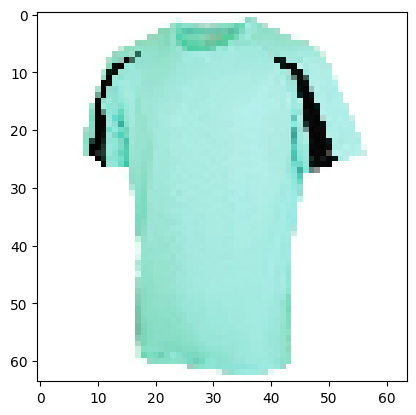

In [11]:
plt.imshow(imagenes[9])

In [12]:
train_images, test_images, train_labels, test_labels = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [13]:
len(train_labels)

18078

In [14]:
len(train_images)

18078

In [15]:
train_images.shape

(18078, 64, 64, 3)

In [16]:
# Normalización de valores de pixeles.

train_images = train_images / 255.0
test_images = test_images / 255.0

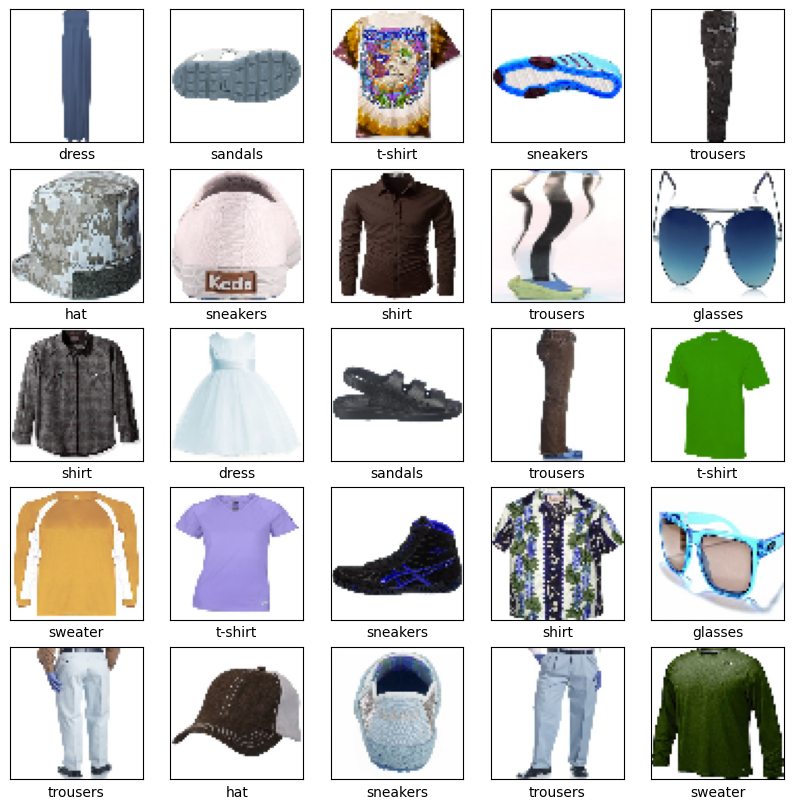

In [24]:
class_names = ['t-shirt', 'dress', 'trousers', 'tank-top', 'shirt', 'sweater', 'sneakers', 'shorts', 'hat', 'glasses', 'jacket', 'sandals']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Estructura** y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)

In [25]:
# Parte convolusional de la RNAC

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


565/565 [==============================] - 110s 193ms/step - loss: 0.9891 - accuracy: 0.6812 - val_loss: 0.6559 - val_accuracy: 0.7907
Epoch 2/10
565/565 [==============================] - 108s 192ms/step - loss: 0.5199 - accuracy: 0.8281 - val_loss: 0.5107 - val_accuracy: 0.8343
Epoch 3/10
565/565 [==============================] - 103s 181ms/step - loss: 0.3655 - accuracy: 0.8783 - val_loss: 0.4487 - val_accuracy: 0.8560
Epoch 4/10
565/565 [==============================] - 105s 187ms/step - loss: 0.2718 - accuracy: 0.9080 - val_loss: 0.4361 - val_accuracy: 0.8684
Epoch 5/10
565/565 [==============================] - 105s 186ms/step - loss: 0.1984 - accuracy: 0.9312 - val_loss: 0.4185 - val_accuracy: 0.8726
Epoch 6/10
565/565 [==============================] - 101s 180ms/step - loss: 0.1516 - accuracy: 0.9481 - val_loss: 0.4595 - val_accuracy: 0.8697
Epoch 7/10
565/565 [==============================] - 102s 180ms/step - loss: 0.1179 - accuracy: 0.9584 - val_loss: 0.5402 - val_accura

# **Resultados** de exactitud de la RNAC

142/142 - 7s - loss: 0.6958 - accuracy: 0.8830 - 7s/epoch - 47ms/step


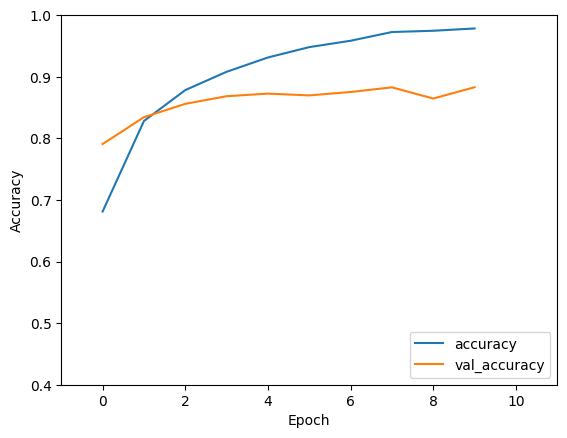

In [29]:
#Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# **Predicciones** con la RNAC entrenada

In [30]:
predictions = model.predict(test_images)

142/142 [==============================] - 7s 47ms/step


In [31]:
x = test_labels[1]
y = np.argmax(predictions[1])
print("La red dice que la imagen es clase; ", x, "y la clase verdadera es:",y)

La red dice que la imagen es clase;  6 y la clase verdadera es: 6


In [32]:
x = test_labels[16]
y = np.argmax(predictions[16])
print("La red dice que la imagen es clase; ", x, "y la clase verdadera es:",y)

La red dice que la imagen es clase;  2 y la clase verdadera es: 2


In [33]:
x = test_labels[-1]
y = np.argmax(predictions[-1])
print("La red dice que la imagen es clase; ", x, "y la clase verdadera es:",y)

La red dice que la imagen es clase;  0 y la clase verdadera es: 0


In [34]:
x = test_labels[60]
y = np.argmax(predictions[60])
print("La red dice que la imagen es clase; ", x, "y la clase verdadera es:",y)

La red dice que la imagen es clase;  4 y la clase verdadera es: 4


In [35]:
x = test_labels[92]
y = np.argmax(predictions[92])
print("La red dice que la imagen es clase; ", x, "y la clase verdadera es:",y)

La red dice que la imagen es clase;  0 y la clase verdadera es: 0


In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(12))
  plt.yticks([])
  thisplot = plt.bar(range(12), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

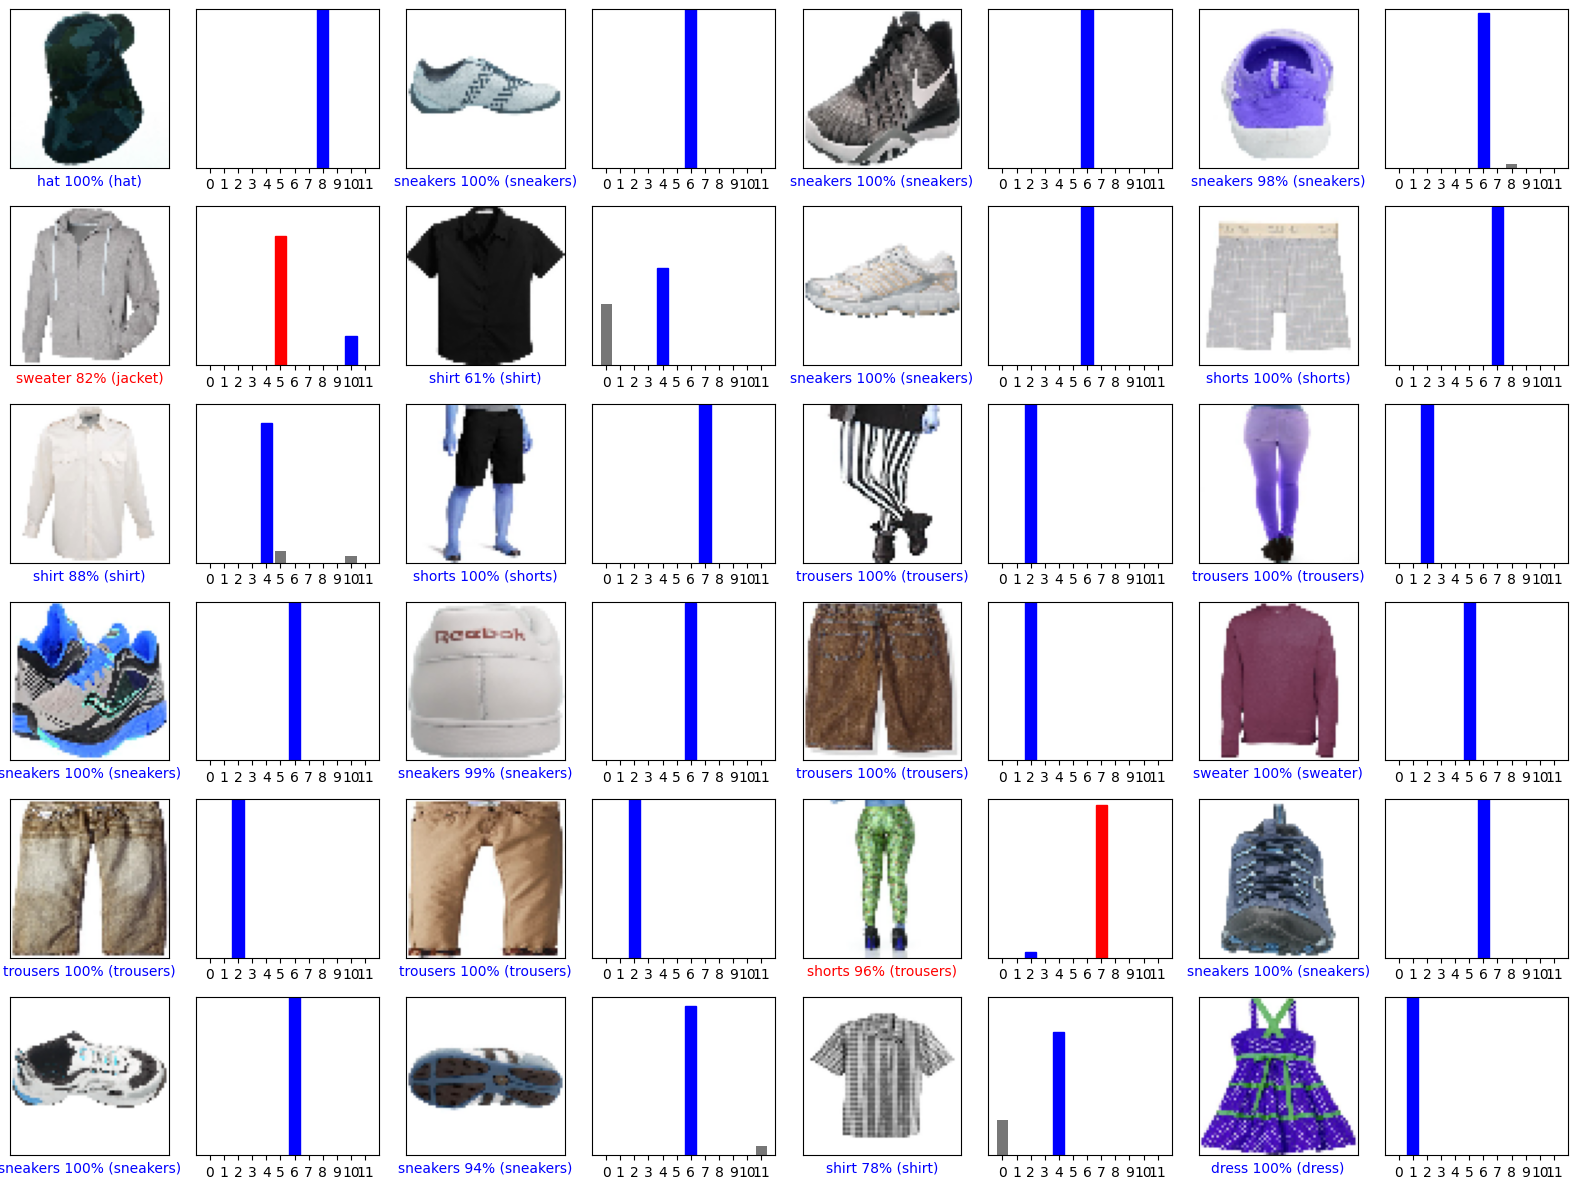

In [37]:
#Graficar multiples imagenes
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()